# Introduction

### Your description of the problem and the practical impacts of solving it.
With the rise of handwriting recognition features in mobile devices, letter recognition has become one of the major problems for classification models. In response to this trend, the project aims to solve three binary classification problems using UCI Machine Learning Repository's Letter Recognition dataset: H and K, M and Y, and O and C. The project will serve as a foundation for mutli-class classification with more letters. In a scale of mobile devices, we can already see many potential applications of the project: digital indexing of handwritten notes, language detection in photos, and handwritten math problem conversion to LaTex. In a larger scale, the project can be used for mail address recognition for postal services.

### What is the motivation for training and testing multiple classifiers? What factors should be considered in determining a classifier as the “best,” e.g. computational complexity, validation accuracy, model interpretability, etc.
Primary motivation for training and testing multiple classifiers is the difference in feature selection methods of each models. For instance, convolutional neural netowrk's feature extraction filter will perform feature extraction by building derived features, or by finding hidden features from an initial dataset while decision trees or random forest models intrinsically perform feature selections. Therefore, by training and testing classifiers with different feature selection methods, we can compare the efficiency of different models for the given problem. 
When evaluating a classifier, one of the most important criteria would be the accuracy of the model since accurate classification of the unseen data is the primary goal of classifiers. Other important factors also include low computation costs (i.e. few hyperparameters), easy interpretability, etc.
### What is the motivation for dimension reduction? Which methods are “better,” and what factors should be considered in determining a dimension reduction method as “good” or “bad.”
Motivations for dimension reduction include: lowering the computational cost of modeling, reducing the number of samples required to fit a model, and removal of uninformative or extra feature variables. No dimension reduction methods are inherently better than the others, but we can use different dimension reduction methods that best suits the problem we're trying to solve. For instance, simple quality filtering would be enough for the lunch data that we used in class instead of building a decision tree model. For determining whether a dimension reduction method is good or bad, the factors that should be considered include: interpretability, computational efficiency, information preservation, etc. 
### Brief description of the dimension reduction method(s) you chose.
Principal Component Analysis (PCA) was my first choice of dimension reduction method. PCA transforms high-dimensional data into a lower-dimensional representation while retaining as much of the original variability as possible. PCA achieves this by identifying the principal components, which are linear combinations of the original features.


### Speculate on the binary classification problems. Which pair of letters did you choose for the third problem? Which pair do you predict will be the easiest or hardest to classify?
I chose O and C for my third problem since I believe it would be one of the hardest binary classification problems using English alphabets due to the similar shape they hold. I believe the easiest pair out of the three pairs would be M and Y since they have almost no resemblance.

# 1. Data preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 


In [3]:
  
# fetch dataset 
letter_recognition = fetch_ucirepo(id=59) 
  
# data (as pandas dataframes) 
X = letter_recognition.data.features 
y = letter_recognition.data.targets 
  
# metadata 
print(letter_recognition.metadata) 
  
# variable information 
print(letter_recognition.variables) 


{'uci_id': 59, 'name': 'Letter Recognition', 'repository_url': 'https://archive.ics.uci.edu/dataset/59/letter+recognition', 'data_url': 'https://archive.ics.uci.edu/static/public/59/data.csv', 'abstract': 'Database of character image features; try to identify the letter', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 20000, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['lettr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Thu Sep 28 2023', 'dataset_doi': '10.24432/C5ZP40', 'creators': ['David Slate'], 'intro_paper': None, 'additional_info': {'summary': 'The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts wa

In [4]:
display(y)
display(X)
data=pd.concat([X,y],axis=1)
display(data)

,lettr
0,T
1,I
2,D
3,N
4,G
...,...
19995,D
19996,C
19997,T
19998,S


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,lettr
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,T
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,I
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,D
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,N
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7,D
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7,C
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4,T
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8,S


In [5]:
# value count for each letter for extra credit
display(data['lettr'].value_counts())

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: lettr, dtype: int64

In [6]:
# variance of each feature
display(data.var())

/var/folders/7w/dj46r5ks7tsglt695mmbyhjr0000gn/T/ipykernel_11195/697179814.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(data.var())


x-box     3.660378
y-box    10.920086
width     4.058506
high      5.113887
onpix     4.798106
x-bar     4.104819
y-bar     5.407270
x2bar     7.289827
y2bar     5.668318
xybar     6.192507
x2ybr     6.922530
xy2br     4.328975
x-ege     5.440747
xegvy     2.392350
y-ege     6.589861
yegvx     2.616209
dtype: float64

# 1. H and K

## First Classification Method:  ANN
### Hyperparameter: learning rate [0.001, 0.01, 0.1, 1, 10]

Accuracy for learning rate  0.001 :  0.9509433962264151
5fold cross validation scores for learning rate  0.001 :  [0.93962264 0.92830189 0.92830189 0.93584906 0.90943396]
Runtime for learning rate  0.001 :  194



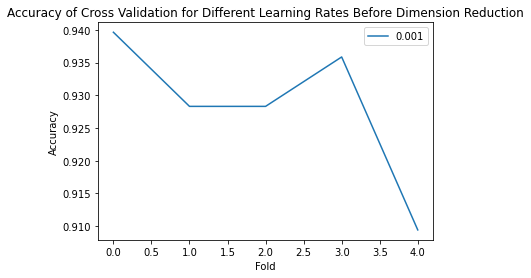

Accuracy for learning rate  0.01 :  0.939622641509434
5fold cross validation scores for learning rate  0.01 :  [0.88301887 0.91698113 0.92075472 0.9245283  0.90566038]
Runtime for learning rate  0.01 :  86



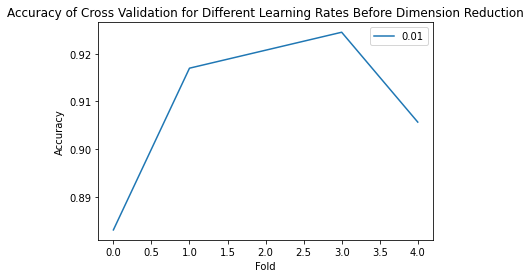

Accuracy for learning rate  0.1 :  0.4830188679245283
5fold cross validation scores for learning rate  0.1 :  [0.50188679 0.50188679 0.50188679 0.50188679 0.49811321]
Runtime for learning rate  0.1 :  16



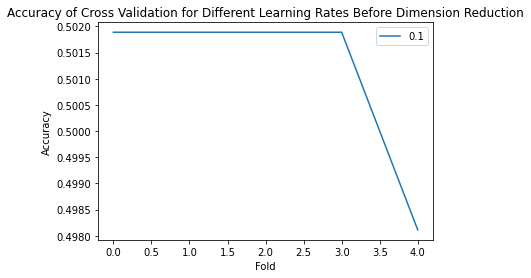

Accuracy for learning rate  1 :  0.4830188679245283
5fold cross validation scores for learning rate  1 :  [0.49811321 0.49811321 0.50188679 0.49811321 0.49811321]
Runtime for learning rate  1 :  13



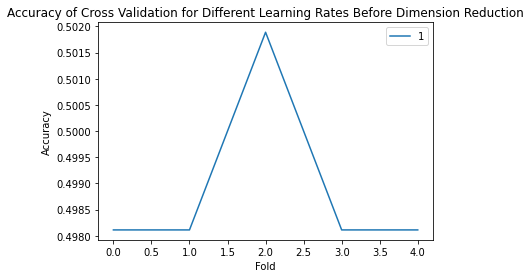

Accuracy for learning rate  10 :  0.5169811320754717
5fold cross validation scores for learning rate  10 :  [0.50188679 0.49811321 0.49811321 0.50188679 0.50188679]
Runtime for learning rate  10 :  12



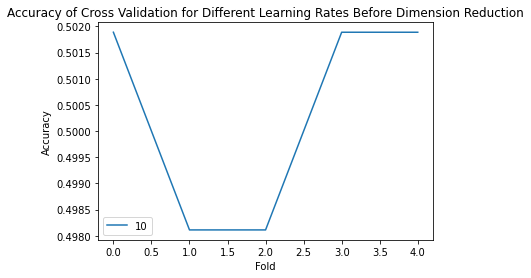

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import DataConversionWarning

# select rows with h and k from data['lettr']
data=pd.DataFrame(data)
dataHK = data.loc[data['lettr'].isin(['H','K'])]

# set aside 10% of data for final validation
dataHK, dataHK_test = train_test_split(dataHK, test_size=0.10)

# split data into X and y
X = dataHK.iloc[:,0:16]
y = dataHK.iloc[:,16:17]

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#ignore dataconversionwarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

#test different learning rates
learning_rates = [0.001, 0.01, 0.1, 1, 10]
for i in learning_rates:
    clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, learning_rate_init=i, max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy for learning rate ", i, ": ", accuracy_score(y_test, y_pred))
    # 5fold cross validation
    scores = cross_val_score(clf, X, y, cv=5)
    print("5fold cross validation scores for learning rate ", i, ": ", scores)
    # print runtime
    print("Runtime for learning rate ", i, ": ", clf.n_iter_)
    print("")
    #plot accuracy of cross validation for each fold
    # show learning rate in the plot
    plt.plot(scores, label=i)
    plt.legend()
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Cross Validation for Different Learning Rates Before Dimension Reduction")
    plt.show()


## Dimension Reduction using PCA


original shape:    (1325, 16)
transformed shape: (1325, 4)
explained variance ratio: [0.41025834 0.23199678 0.10720476 0.07225879]
sum of explained variance ratio: 0.8217186700707245
Accuracy for learning rate  0.001 :  0.8641509433962264
5fold cross validation scores for learning rate  0.001 :  [0.87924528 0.89433962 0.88301887 0.8754717  0.86037736]
Runtime for learning rate  0.001 :  416



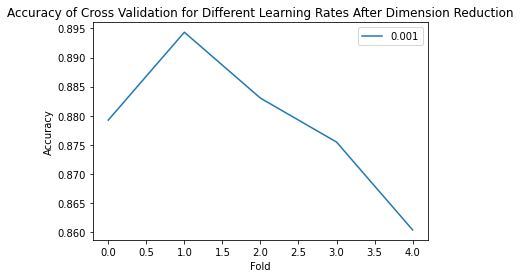

Accuracy for learning rate  0.01 :  0.8830188679245283
5fold cross validation scores for learning rate  0.01 :  [0.86415094 0.89811321 0.91698113 0.88301887 0.86792453]
Runtime for learning rate  0.01 :  115



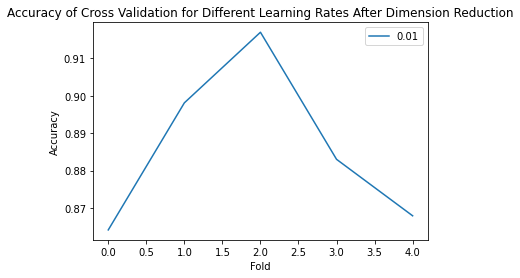

Accuracy for learning rate  0.1 :  0.9018867924528302
5fold cross validation scores for learning rate  0.1 :  [0.88679245 0.88679245 0.92075472 0.91698113 0.87169811]
Runtime for learning rate  0.1 :  47



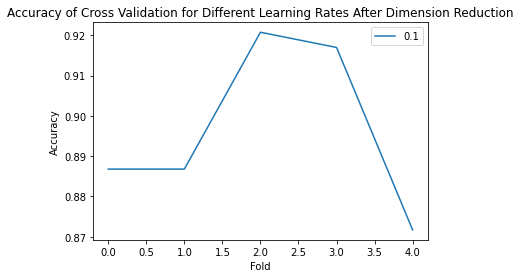

Accuracy for learning rate  1 :  0.49056603773584906
5fold cross validation scores for learning rate  1 :  [0.49811321 0.50188679 0.49811321 0.49811321 0.49811321]
Runtime for learning rate  1 :  16



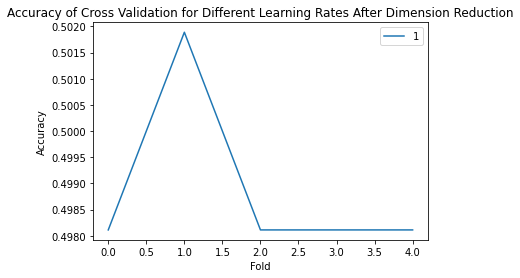

Accuracy for learning rate  10 :  0.49056603773584906
5fold cross validation scores for learning rate  10 :  [0.50188679 0.49811321 0.49811321 0.50188679 0.50188679]
Runtime for learning rate  10 :  13



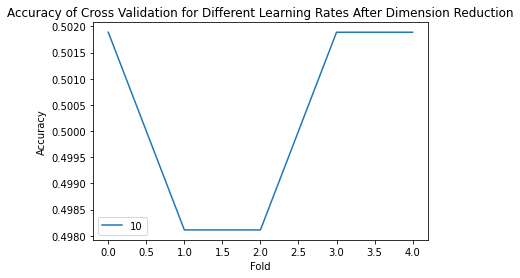

In [8]:
## PCA
## 4 features
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
print("explained variance ratio:", pca.explained_variance_ratio_)
print("sum of explained variance ratio:", sum(pca.explained_variance_ratio_))

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20)

#test different learning rates
learning_rates = [0.001, 0.01, 0.1, 1, 10]
for i in learning_rates:
    clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, learning_rate_init=i, max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy for learning rate ", i, ": ", accuracy_score(y_test, y_pred))
    # 5fold cross validation
    scores = cross_val_score(clf, X_pca, y, cv=5)
    print("5fold cross validation scores for learning rate ", i, ": ", scores)
    # print runtime
    print("Runtime for learning rate ", i, ": ", clf.n_iter_)
    print("")
    #plot accuracy of cross validation for each fold
    # show learning rate in the plot
    plt.plot(scores, label=i)
    plt.legend()
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Cross Validation for Different Learning Rates After Dimension Reduction")
    plt.show()


## Second Classification Method: kNN
### Hyperparameter: k
### k: 1, 5, 10, 15, 20

Accuracy for k =  1 :  0.939622641509434
5fold cross validation scores for k =  1 :  [0.9509434  0.95849057 0.95849057 0.96603774 0.95849057]


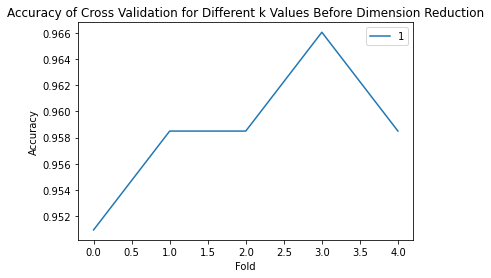

Accuracy for k =  5 :  0.9584905660377359
5fold cross validation scores for k =  5 :  [0.94339623 0.95471698 0.94339623 0.94339623 0.91698113]


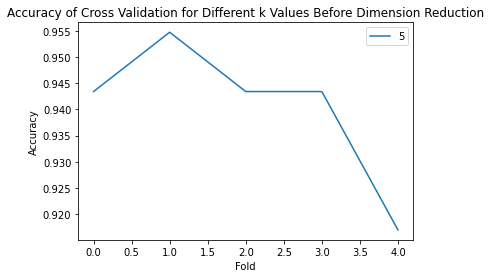

Accuracy for k =  10 :  0.9169811320754717
5fold cross validation scores for k =  10 :  [0.93207547 0.96226415 0.93962264 0.92830189 0.92830189]


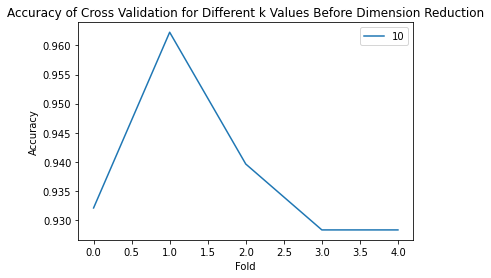

Accuracy for k =  15 :  0.9207547169811321
5fold cross validation scores for k =  15 :  [0.91320755 0.94339623 0.94339623 0.91320755 0.93207547]


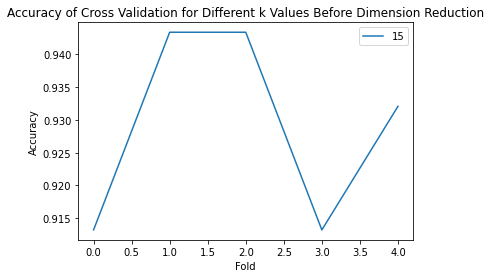

Accuracy for k =  20 :  0.909433962264151
5fold cross validation scores for k =  20 :  [0.93584906 0.92830189 0.95471698 0.91698113 0.90188679]


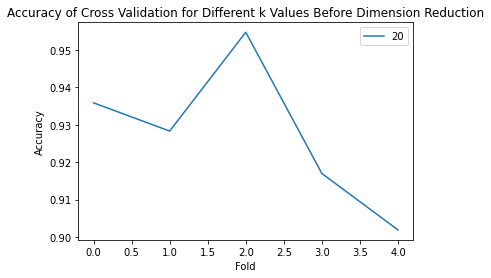

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#test different k values
k_values = [1, 5, 10, 15, 20]

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy for k = ", i, ": ", accuracy_score(y_test, y_pred))
    # 5fold cross validation
    scores = cross_val_score(clf, X, y, cv=5)
    print("5fold cross validation scores for k = ", i, ": ", scores)
    #plot accuracy of cross validation for each fold
    # show k in the plot
    plt.plot(scores, label=i)
    plt.legend()
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Cross Validation for Different k Values Before Dimension Reduction")
    plt.show()

## Dimension reduction using PCA

original shape:    (1325, 16)
transformed shape: (1325, 4)
explained variance ratio: [0.41025834 0.23199678 0.10720476 0.07225879]
sum of explained variance ratio: 0.8217186700696972
Accuracy for k =  1 :  0.8981132075471698
5fold cross validation scores for k =  1 :  [0.86415094 0.84528302 0.90943396 0.88679245 0.86037736]


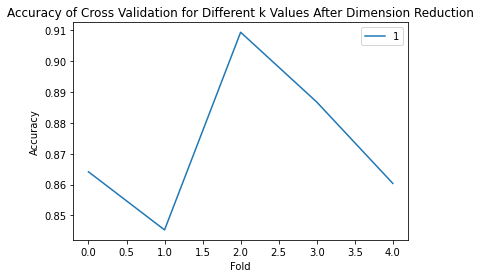

Accuracy for k =  5 :  0.8981132075471698
5fold cross validation scores for k =  5 :  [0.89811321 0.89433962 0.91698113 0.88679245 0.89433962]


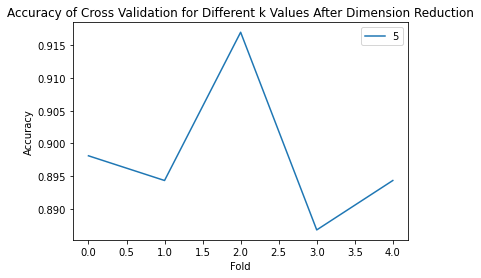

Accuracy for k =  10 :  0.8754716981132076
5fold cross validation scores for k =  10 :  [0.88679245 0.90566038 0.90188679 0.89056604 0.89433962]


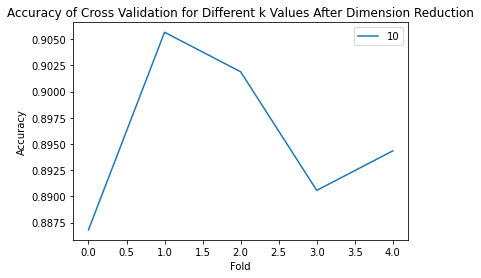

Accuracy for k =  15 :  0.8679245283018868
5fold cross validation scores for k =  15 :  [0.8754717  0.88679245 0.90188679 0.87169811 0.89811321]


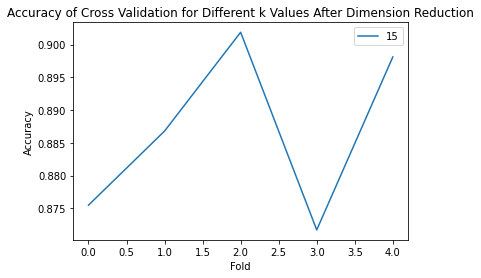

Accuracy for k =  20 :  0.8603773584905661
5fold cross validation scores for k =  20 :  [0.88679245 0.89433962 0.89811321 0.90188679 0.87924528]


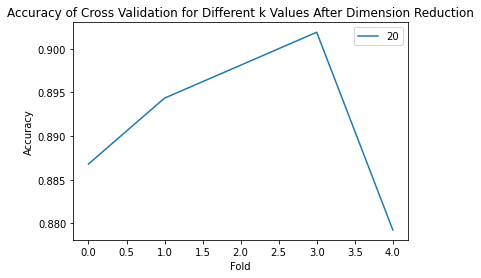

In [10]:
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
print("explained variance ratio:", pca.explained_variance_ratio_)
print("sum of explained variance ratio:", sum(pca.explained_variance_ratio_))

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20)

#test different k values
k_values = [1, 5, 10, 15, 20]

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy for k = ", i, ": ", accuracy_score(y_test, y_pred))
    # 5fold cross validation
    scores = cross_val_score(clf, X_pca, y, cv=5)
    print("5fold cross validation scores for k = ", i, ": ", scores)
    #plot accuracy of cross validation for each fold
    # show k in the plot
    plt.plot(scores, label=i)
    plt.legend()
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Cross Validation for Different k Values After Dimension Reduction")
    plt.show()

# 2. M and Y

## First Classification Method:  ANN
### Hyperparameter: hidden layer sizes
### hidden layer size: (5,2), (10,5), (20,10), (30,15), (40,20)

Accuracy for hidden layer size  (5, 2) :  0.9964788732394366
5fold cross validation scores for hidden layer size  (5, 2) :  [0.99295775 1.         1.         0.99295775 1.        ]
Runtime for hidden layer size  (5, 2) :  146



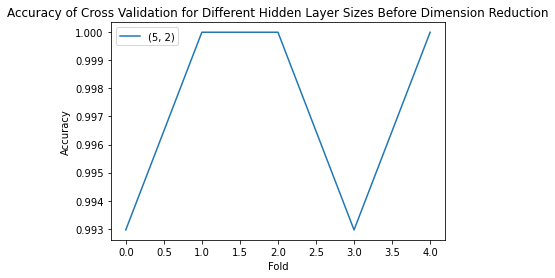

Accuracy for hidden layer size  (10, 5) :  0.9964788732394366
5fold cross validation scores for hidden layer size  (10, 5) :  [0.99295775 1.         0.99647887 0.99647887 1.        ]
Runtime for hidden layer size  (10, 5) :  312



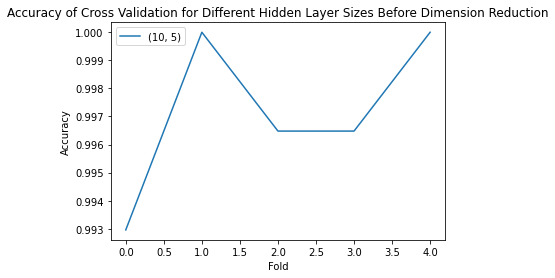

Accuracy for hidden layer size  (20, 10) :  0.9964788732394366
5fold cross validation scores for hidden layer size  (20, 10) :  [0.99647887 1.         1.         0.99647887 1.        ]
Runtime for hidden layer size  (20, 10) :  111



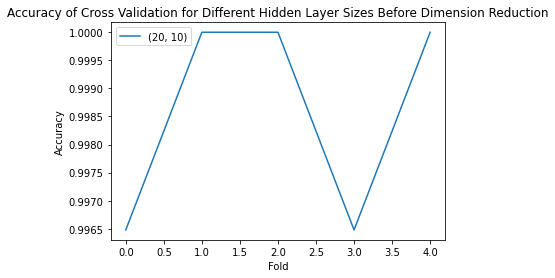

Accuracy for hidden layer size  (30, 15) :  0.9964788732394366
5fold cross validation scores for hidden layer size  (30, 15) :  [0.99647887 1.         1.         0.99647887 1.        ]
Runtime for hidden layer size  (30, 15) :  129



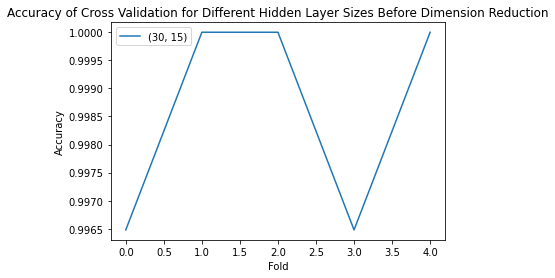

Accuracy for hidden layer size  (40, 20) :  0.9964788732394366
5fold cross validation scores for hidden layer size  (40, 20) :  [0.99295775 1.         1.         0.99647887 1.        ]
Runtime for hidden layer size  (40, 20) :  106



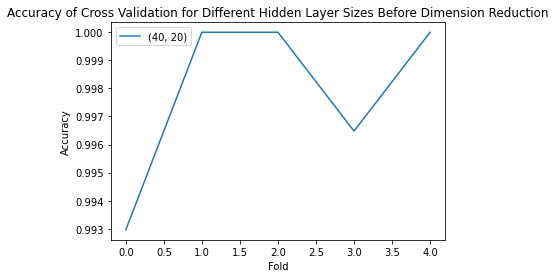

In [11]:
# select rows with m and y from data['lettr']
dataMY = data.loc[data['lettr'].isin(['M','Y'])]

# set aside 10% of data for final validation
dataMY, dataMY_test = train_test_split(dataMY, test_size=0.10)

# split data into X and y
X = dataMY.iloc[:,0:16]
y = dataMY.iloc[:,16:17]

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#test different hidden layer sizes
hidden_layer_sizes = [(5,2), (10,5), (20,10), (30,15), (40,20)]

for i in hidden_layer_sizes:
    clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=i, random_state=1, learning_rate_init=0.01, max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy for hidden layer size ", i, ": ", accuracy_score(y_test, y_pred))
    # 5fold cross validation
    scores = cross_val_score(clf, X, y, cv=5)
    print("5fold cross validation scores for hidden layer size ", i, ": ", scores)
    # print runtime
    print("Runtime for hidden layer size ", i, ": ", clf.n_iter_)
    print("")
    #plot accuracy of cross validation for each fold
    # show hidden layer size in the plot
    plt.plot(scores, label=i)
    plt.legend()
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Cross Validation for Different Hidden Layer Sizes Before Dimension Reduction")
    plt.show()



## Dimension Reduction using PCA


original shape:    (1420, 16)
transformed shape: (1420, 4)
explained variance ratio: [0.37915361 0.24111482 0.09316259 0.07164497]
sum of explained variance ratio: 0.7850759955705133
Accuracy for hidden layer size  (5, 2) :  0.9788732394366197
5fold cross validation scores for hidden layer size  (5, 2) :  [0.97535211 0.98591549 0.98239437 0.98943662 0.98591549]
Runtime for hidden layer size  (5, 2) :  137



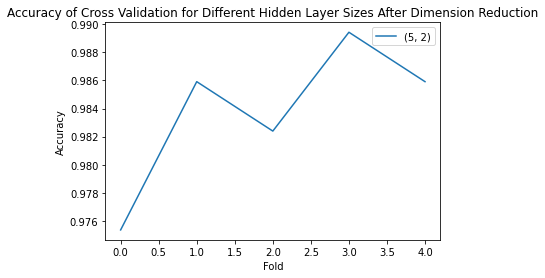

Accuracy for hidden layer size  (10, 5) :  0.9823943661971831
5fold cross validation scores for hidden layer size  (10, 5) :  [0.97887324 0.99295775 0.97535211 0.98239437 0.98591549]
Runtime for hidden layer size  (10, 5) :  62



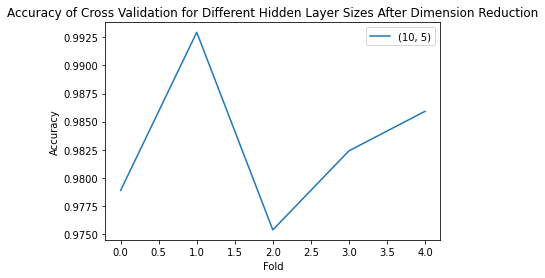

Accuracy for hidden layer size  (20, 10) :  0.9788732394366197
5fold cross validation scores for hidden layer size  (20, 10) :  [0.97535211 0.99295775 0.97887324 0.98943662 0.98943662]
Runtime for hidden layer size  (20, 10) :  75



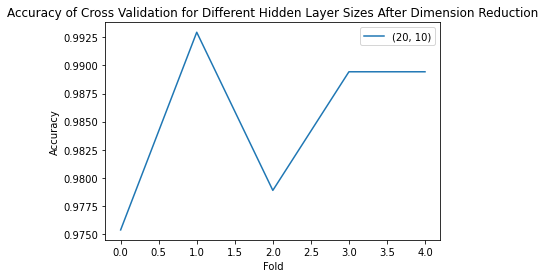

Accuracy for hidden layer size  (30, 15) :  0.9753521126760564
5fold cross validation scores for hidden layer size  (30, 15) :  [0.97535211 0.99295775 0.97887324 0.98239437 0.98591549]
Runtime for hidden layer size  (30, 15) :  124



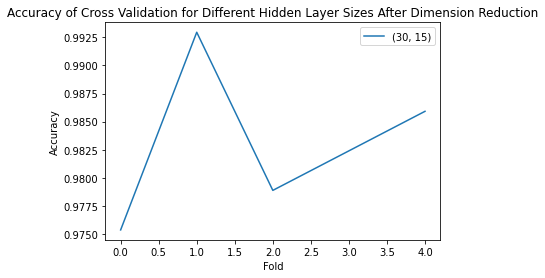

Accuracy for hidden layer size  (40, 20) :  0.9788732394366197
5fold cross validation scores for hidden layer size  (40, 20) :  [0.97535211 0.99295775 0.98239437 0.98591549 0.98943662]
Runtime for hidden layer size  (40, 20) :  109



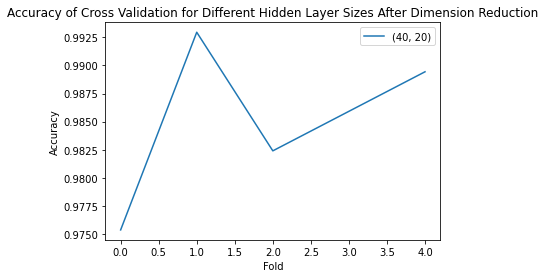

In [12]:
# PCA
# 4 features
pca = PCA(n_components=4)
pca.fit(X)

X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
print("explained variance ratio:", pca.explained_variance_ratio_)
print("sum of explained variance ratio:", sum(pca.explained_variance_ratio_))

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20)

#test different hidden layer sizes
hidden_layer_sizes = [(5,2), (10,5), (20,10), (30,15), (40,20)]

for i in hidden_layer_sizes:
    clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=i, random_state=1, learning_rate_init=0.01, max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy for hidden layer size ", i, ": ", accuracy_score(y_test, y_pred))
    # 5fold cross validation
    scores = cross_val_score(clf, X_pca, y, cv=5)
    print("5fold cross validation scores for hidden layer size ", i, ": ", scores)
    # print runtime
    print("Runtime for hidden layer size ", i, ": ", clf.n_iter_)
    print("")
    #plot accuracy of cross validation for each fold
    # show hidden layer size in the plot
    plt.plot(scores, label=i)
    plt.legend()
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Cross Validation for Different Hidden Layer Sizes After Dimension Reduction")
    plt.show()

## Second Classification Method: kNN
### Hyperparameter: k
### k: 1, 5, 10, 15, 20

Accuracy for k =  1 :  1.0
5fold cross validation scores for k =  1 :  [1. 1. 1. 1. 1.]


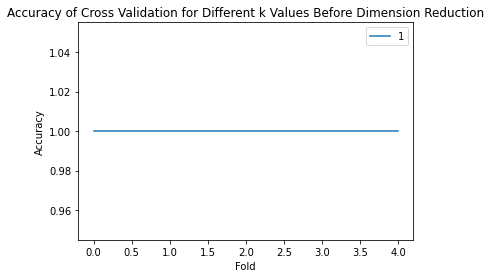

Accuracy for k =  5 :  0.9964788732394366
5fold cross validation scores for k =  5 :  [0.99647887 1.         0.99647887 0.99647887 1.        ]


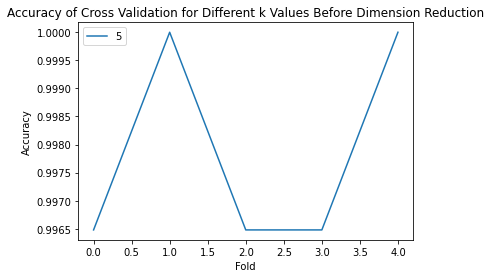

Accuracy for k =  10 :  0.9964788732394366
5fold cross validation scores for k =  10 :  [0.99647887 1.         0.99647887 0.99647887 1.        ]


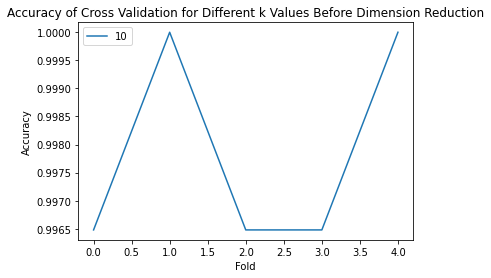

Accuracy for k =  15 :  0.9964788732394366
5fold cross validation scores for k =  15 :  [0.99647887 1.         0.99295775 0.99647887 1.        ]


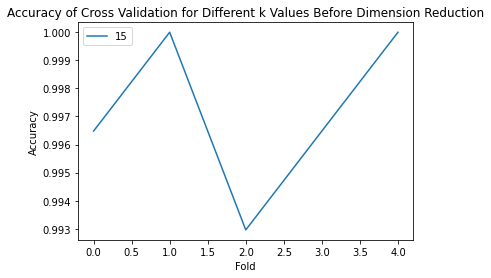

Accuracy for k =  20 :  0.9929577464788732
5fold cross validation scores for k =  20 :  [0.99647887 1.         0.99295775 0.99647887 0.99647887]


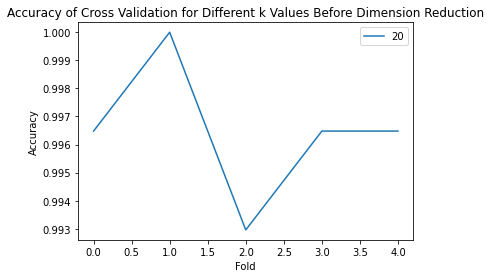

In [13]:
# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#test different k values
k_values = [1, 5, 10, 15, 20]

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy for k = ", i, ": ", accuracy_score(y_test, y_pred))
    # 5fold cross validation
    scores = cross_val_score(clf, X, y, cv=5)
    print("5fold cross validation scores for k = ", i, ": ", scores)
    #plot accuracy of cross validation for each fold
    # show k in the plot
    plt.plot(scores, label=i)
    plt.legend()
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Cross Validation for Different k Values Before Dimension Reduction")
    plt.show()

## Dimension Reduction using PCA

original shape:    (1420, 16)
transformed shape: (1420, 4)
explained variance ratio: [0.37915361 0.24111482 0.09316259 0.07164497]
sum of explained variance ratio: 0.785075995569552
Accuracy for k =  1 :  0.9788732394366197
5fold cross validation scores for k =  1 :  [0.96478873 0.99647887 0.96478873 0.98239437 0.99295775]


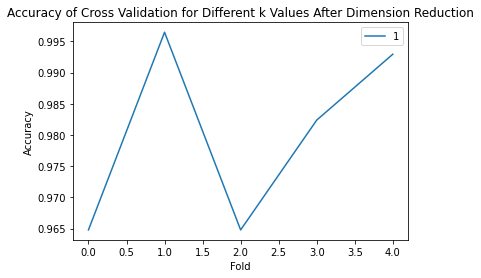

Accuracy for k =  5 :  0.971830985915493
5fold cross validation scores for k =  5 :  [0.97183099 0.98591549 0.97183099 0.98591549 0.98943662]


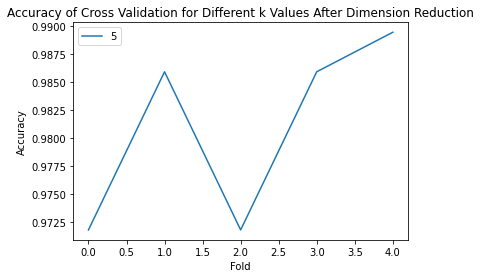

Accuracy for k =  10 :  0.9753521126760564
5fold cross validation scores for k =  10 :  [0.97183099 0.99295775 0.97183099 0.98943662 0.98591549]


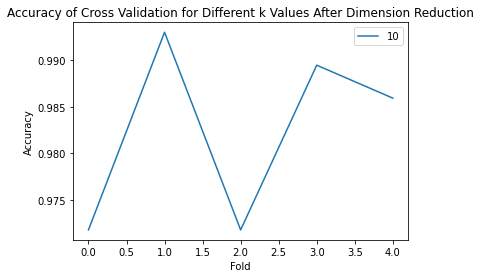

Accuracy for k =  15 :  0.9753521126760564
5fold cross validation scores for k =  15 :  [0.96830986 0.99295775 0.97535211 0.98239437 0.98943662]


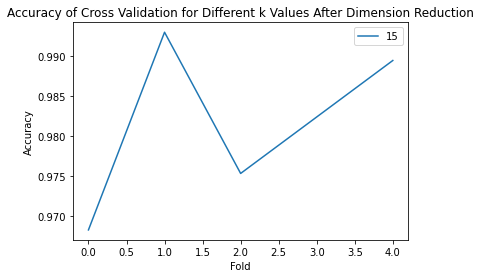

Accuracy for k =  20 :  0.971830985915493
5fold cross validation scores for k =  20 :  [0.96830986 0.99295775 0.97887324 0.97887324 0.98943662]


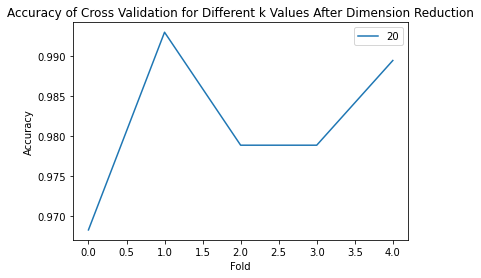

In [14]:

# PCA
# 4 features
pca = PCA(n_components=4)
pca.fit(X)

X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
print("explained variance ratio:", pca.explained_variance_ratio_)
print("sum of explained variance ratio:", sum(pca.explained_variance_ratio_))

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20)

#test different k values
k_values = [1, 5, 10, 15, 20]

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy for k = ", i, ": ", accuracy_score(y_test, y_pred))
    # 5fold cross validation
    scores = cross_val_score(clf, X_pca, y, cv=5)
    print("5fold cross validation scores for k = ", i, ": ", scores)
    #plot accuracy of cross validation for each fold
    # show k in the plot
    plt.plot(scores, label=i)
    plt.legend()
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Cross Validation for Different k Values After Dimension Reduction")
    plt.show()


## 3. O and C

## First Classification Method:  ANN
### Hyperparameter: maximum number of iterations
### Number of iterations: 100, 200, 300, 400, 500

Accuracy for max iterations  50 :  0.8955223880597015
5fold cross validation scores for max iterations  50 :  [0.91791045 0.8880597  0.89925373 0.92537313 0.92164179]
Runtime for max iterations  50 :  50



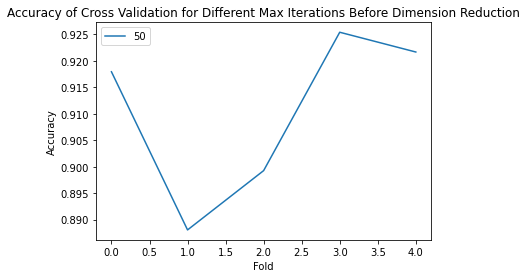

Accuracy for max iterations  100 :  0.9514925373134329
5fold cross validation scores for max iterations  100 :  [0.94402985 0.93656716 0.93656716 0.93656716 0.95895522]
Runtime for max iterations  100 :  100



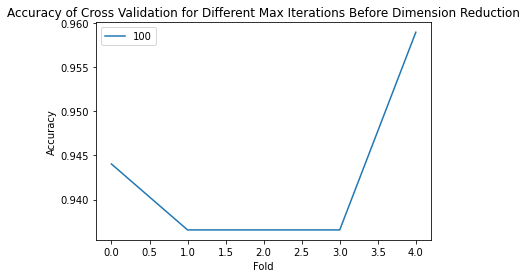

Accuracy for max iterations  150 :  0.9701492537313433
5fold cross validation scores for max iterations  150 :  [0.94776119 0.95149254 0.94402985 0.94776119 0.96268657]
Runtime for max iterations  150 :  150



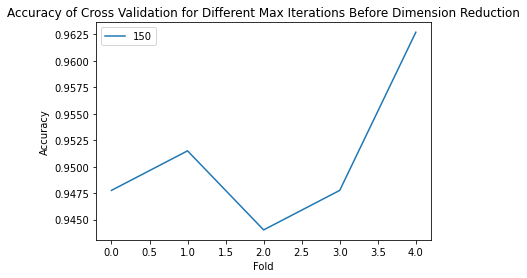

Accuracy for max iterations  200 :  0.9701492537313433
5fold cross validation scores for max iterations  200 :  [0.95895522 0.95895522 0.96268657 0.94029851 0.96641791]
Runtime for max iterations  200 :  200



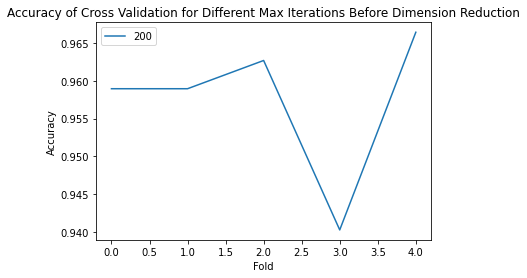

Accuracy for max iterations  250 :  0.9701492537313433
5fold cross validation scores for max iterations  250 :  [0.96268657 0.96268657 0.95895522 0.94029851 0.96641791]
Runtime for max iterations  250 :  250



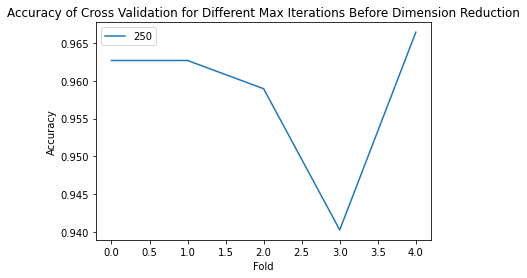

In [15]:
from sklearn.exceptions import ConvergenceWarning

# select rows with o and c from data['lettr']
dataOC = data.loc[data['lettr'].isin(['O','C'])]

# set aside 10% of data for final validation
dataOC, dataOC_test = train_test_split(dataOC, test_size=0.10)

# split data into X and y
X = dataOC.iloc[:,0:16]
y = dataOC.iloc[:,16:17]

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#test different max iterations
max_iterations = [50, 100, 150, 200, 250]

#ignore convergencewarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


for i in max_iterations:
    clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy for max iterations ", i, ": ", accuracy_score(y_test, y_pred))
    # 5fold cross validation
    scores = cross_val_score(clf, X, y, cv=5)
    print("5fold cross validation scores for max iterations ", i, ": ", scores)
    # print runtime
    print("Runtime for max iterations ", i, ": ", clf.n_iter_)
    print("")
    #plot accuracy of cross validation for each fold
    # show max iterations in the plot
    plt.plot(scores, label=i)
    plt.legend()
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Cross Validation for Different Max Iterations Before Dimension Reduction")
    plt.show()

## Dimension Reduction using PCA

original shape:    (1340, 16)
transformed shape: (1340, 4)
explained variance ratio: [0.42851944 0.21129731 0.09692567 0.08283567]
sum of explained variance ratio: 0.8195780803457505
Accuracy for max iterations  50 :  0.8805970149253731
5fold cross validation scores for max iterations  50 :  [0.89552239 0.88432836 0.86567164 0.88059701 0.86940299]
Runtime for max iterations  50 :  50



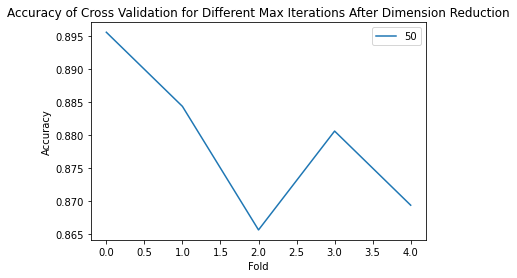

Accuracy for max iterations  100 :  0.8955223880597015
5fold cross validation scores for max iterations  100 :  [0.89925373 0.89552239 0.87313433 0.8880597  0.8880597 ]
Runtime for max iterations  100 :  100



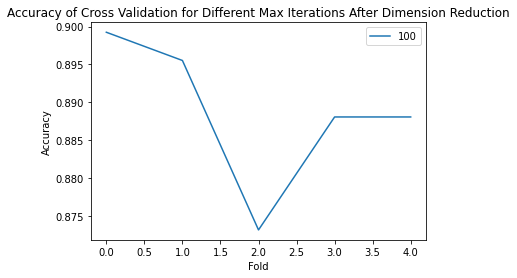

Accuracy for max iterations  150 :  0.9029850746268657
5fold cross validation scores for max iterations  150 :  [0.89552239 0.89925373 0.8880597  0.8880597  0.8880597 ]
Runtime for max iterations  150 :  150



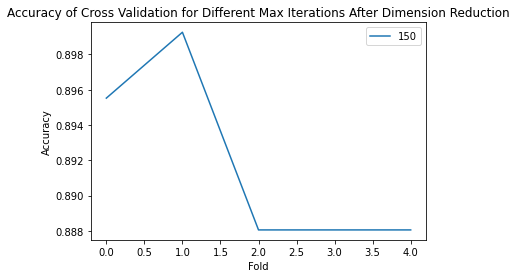

Accuracy for max iterations  200 :  0.9029850746268657
5fold cross validation scores for max iterations  200 :  [0.91791045 0.89925373 0.89179104 0.89552239 0.89925373]
Runtime for max iterations  200 :  200



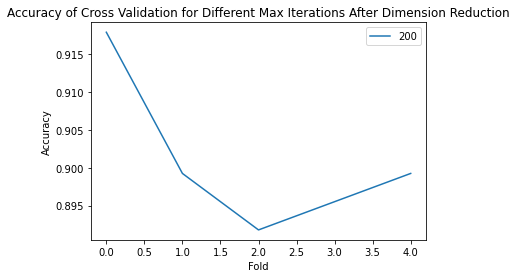

Accuracy for max iterations  250 :  0.9029850746268657
5fold cross validation scores for max iterations  250 :  [0.95522388 0.89925373 0.89179104 0.92164179 0.92164179]
Runtime for max iterations  250 :  250



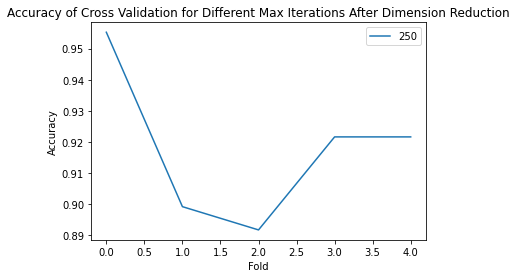

In [16]:
# PCA
# 4 features
pca = PCA(n_components=4)
pca.fit(X)

X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
print("explained variance ratio:", pca.explained_variance_ratio_)
print("sum of explained variance ratio:", sum(pca.explained_variance_ratio_))

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20)

#test different max iterations
max_iterations = [50, 100, 150, 200, 250]

for i in max_iterations:
    clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy for max iterations ", i, ": ", accuracy_score(y_test, y_pred))
    # 5fold cross validation
    scores = cross_val_score(clf, X_pca, y, cv=5)
    print("5fold cross validation scores for max iterations ", i, ": ", scores)
    # print runtime
    print("Runtime for max iterations ", i, ": ", clf.n_iter_)
    print("")
    #plot accuracy of cross validation for each fold
    # show max iterations in the plot
    plt.plot(scores, label=i)
    plt.legend()
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Cross Validation for Different Max Iterations After Dimension Reduction")
    plt.show()

## Second Classification Method: kNN
### Hyperparameter: k
### k: 1, 5, 10, 15, 20

Accuracy for k =  1 :  0.9888059701492538
5fold cross validation scores for k =  1 :  [0.98880597 0.99253731 0.99253731 0.98507463 1.        ]


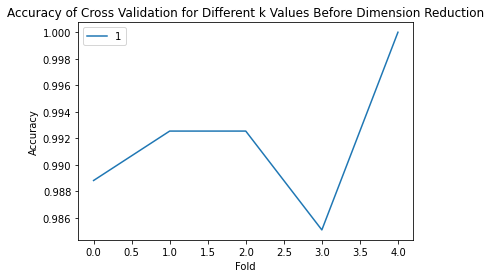

Accuracy for k =  5 :  0.9850746268656716
5fold cross validation scores for k =  5 :  [0.97761194 0.99253731 0.99253731 0.98880597 0.99253731]


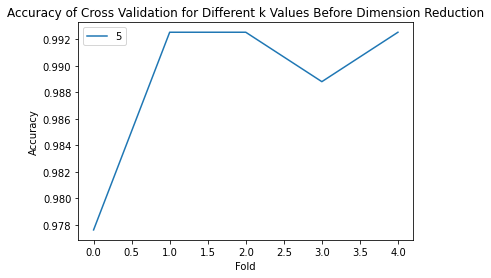

Accuracy for k =  10 :  0.9888059701492538
5fold cross validation scores for k =  10 :  [0.98134328 0.99253731 0.98880597 0.98880597 0.99253731]


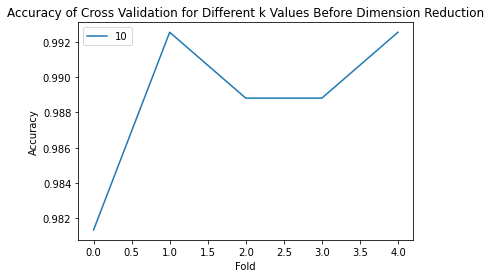

Accuracy for k =  15 :  0.9850746268656716
5fold cross validation scores for k =  15 :  [0.98507463 0.99253731 0.98507463 0.98880597 0.98507463]


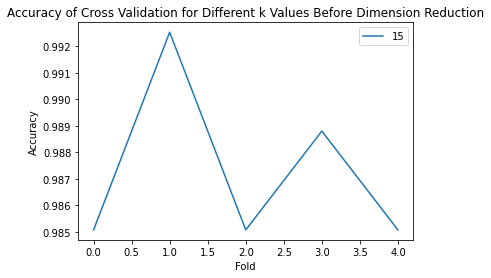

Accuracy for k =  20 :  0.9813432835820896
5fold cross validation scores for k =  20 :  [0.98507463 0.99253731 0.98507463 0.97761194 0.98507463]


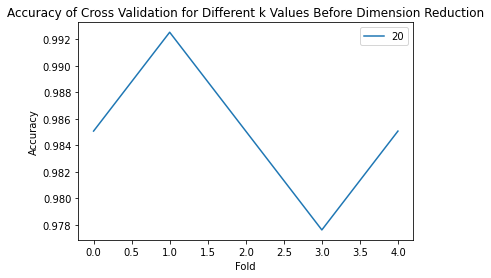

In [17]:
# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#test different k values
k_values = [1, 5, 10, 15, 20]

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy for k = ", i, ": ", accuracy_score(y_test, y_pred))
    # 5fold cross validation
    scores = cross_val_score(clf, X, y, cv=5)
    print("5fold cross validation scores for k = ", i, ": ", scores)
    #plot accuracy of cross validation for each fold
    # show k in the plot
    plt.plot(scores, label=i)
    plt.legend()
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Cross Validation for Different k Values Before Dimension Reduction")
    plt.show()

## Dimension Reduction using PCA

original shape:    (1340, 16)
transformed shape: (1340, 4)
explained variance ratio: [0.42851944 0.21129731 0.09692567 0.08283567]
sum of explained variance ratio: 0.8195780803456193
Accuracy for k =  1 :  0.9813432835820896
5fold cross validation scores for k =  1 :  [0.97761194 0.97761194 0.98134328 0.98507463 0.99626866]


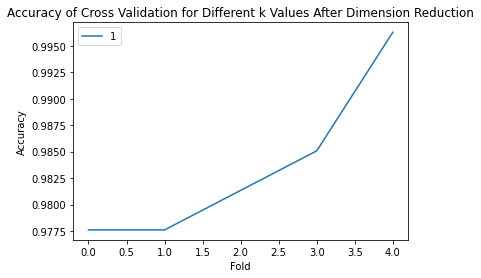

Accuracy for k =  5 :  0.9776119402985075
5fold cross validation scores for k =  5 :  [0.97761194 0.98134328 0.98134328 0.98507463 0.98880597]


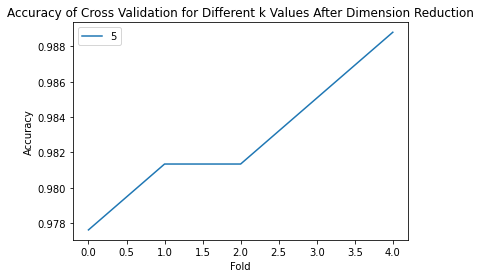

Accuracy for k =  10 :  0.9776119402985075
5fold cross validation scores for k =  10 :  [0.9738806  0.98507463 0.98507463 0.98507463 0.98507463]


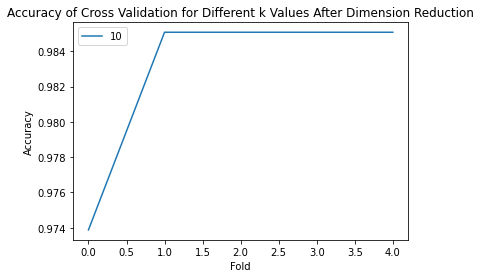

Accuracy for k =  15 :  0.9813432835820896
5fold cross validation scores for k =  15 :  [0.98507463 0.98134328 0.97761194 0.98134328 0.98134328]


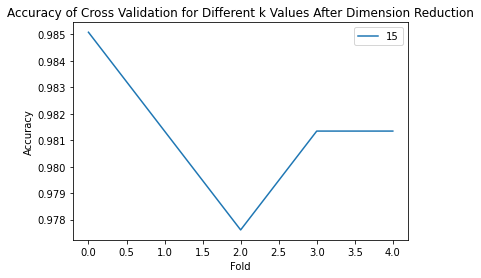

Accuracy for k =  20 :  0.9738805970149254
5fold cross validation scores for k =  20 :  [0.98134328 0.98134328 0.9738806  0.97761194 0.98134328]


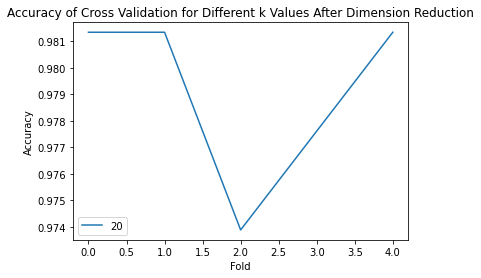

In [18]:
# PCA
# 4 features
pca = PCA(n_components=4)
pca.fit(X)

X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
print("explained variance ratio:", pca.explained_variance_ratio_)
print("sum of explained variance ratio:", sum(pca.explained_variance_ratio_))

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20)

#test different k values
k_values = [1, 5, 10, 15, 20]

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy for k = ", i, ": ", accuracy_score(y_test, y_pred))
    # 5fold cross validation
    scores = cross_val_score(clf, X_pca, y, cv=5)
    print("5fold cross validation scores for k = ", i, ": ", scores)
    #plot accuracy of cross validation for each fold
    # show k in the plot
    plt.plot(scores, label=i)
    plt.legend()
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Cross Validation for Different k Values After Dimension Reduction")
    plt.show()

# Results

### Brief description of the classifier and its general advantages and disadvantages.
ANN: ANN consists of input layers, hidden layers, and output layers where through all three of these layers, we get the final classification of the input. The advantages of ANN classifiers are that they are robust, can capture non-linear patterns in data, and can perform feature extraction from the initial dataset. The disadvantages of ANN classifiers are that due to its black box nature, it is hard to interpret the process of classification and the data-intensive nature of the model.


kNN: k-Nearest Neighbor classifier makes predictions based on the majority class or average of the nearest data points. The advantages of kNN classifiers lies in the simplicity; it is easy to understand the result. There is no training period for kNN models as well. The disadvantages of kNN classifiers are that they are sensitive to noises and outliers and storing training data may take up a lot of space since the models use entire training dataset.

### Figure: Graph the cross validation results (from fitting the classification model without dimension reduction) over the range of hyperparameter values you tested. There should be three sets of values, one for each binary classification problem.

Please refer to outputs above.

### Figure: Graph the cross validation results (from fitting the classification model with dimension reduction) over the range of hyperparameter values you tested. There should be three sets of values, one for each binary classification problem.
Please refer to outputs above.


# Discussion

### Compare the performance and run time of the different classifiers on the final validation sets with either a table or a figure.

In [19]:
# validation on H and K
# split data into X and y
X = dataHK.iloc[:,0:16]
y = dataHK.iloc[:,16:17]

X_validation = dataHK_test.iloc[:,0:16]
y_validation = dataHK_test.iloc[:,16:17]

# ANN - learning rate

# best learning rate for 16 features = 0.001
# train on all data with best learning rate
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, learning_rate_init=0.001, max_iter=1000)
clf.fit(X, y)
y_pred = clf.predict(X_validation)

hkANNprePCA = accuracy_score(y_validation, y_pred)
print("Pre PCA H and K ANN accuracy for learning rate ", 0.001, ": ", hkANNprePCA)
# runtime
hkANNprePCAruntime = clf.n_iter_
print("Runtime for learning rate ", 0.001, ": ", hkANNprePCAruntime)

# best learning rate for 4 features = 0.1
# train on all data with best learning rate
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)

clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, learning_rate_init=0.1, max_iter=1000)
clf.fit(X_pca, y)

# pca on validation data
X_validation = pca.transform(X_validation)

y_pred = clf.predict(X_validation)

hkANNpostPCA = accuracy_score(y_validation, y_pred)
print("Post PCA H and K ANN accuracy for learning rate ", 0.001, ": ", hkANNpostPCA)
# runtime
hkANNpostPCAruntime = clf.n_iter_
print("Runtime for learning rate ", 0.001, ": ", hkANNpostPCAruntime)

#kNN - k
X_validation = dataHK_test.iloc[:,0:16]
y_validation = dataHK_test.iloc[:,16:17]

# best k for 16 features = 5
# train on all data with best k
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)
y_pred = clf.predict(X_validation)

hkKNNprePCA = accuracy_score(y_validation, y_pred)
print("Pre PCA H and K kNN accuracy for k = ", 1, ": ", hkKNNprePCA)

# best k for 4 features = 1
# train on all data with best k
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_pca, y)

# pca on validation data
X_validation = pca.transform(X_validation)

y_pred = clf.predict(X_validation)

hkKNNpostPCA = accuracy_score(y_validation, y_pred)
print("Post PCA H and K kNN accuracy for k = ", 10, ": ", hkKNNpostPCA)


Pre PCA H and K ANN accuracy for learning rate  0.001 :  0.9527027027027027
Runtime for learning rate  0.001 :  160
Post PCA H and K ANN accuracy for learning rate  0.001 :  0.8783783783783784
Runtime for learning rate  0.001 :  480
Pre PCA H and K kNN accuracy for k =  1 :  0.972972972972973
Post PCA H and K kNN accuracy for k =  10 :  0.8918918918918919


In [24]:
# validation on M and Y
# split data into X and y
X = dataMY.iloc[:,0:16]
y = dataMY.iloc[:,16:17]

X_validation = dataMY_test.iloc[:,0:16]
y_validation = dataMY_test.iloc[:,16:17]

# ANN - hidden layer size

# best hidden layer size for 16 features = (5,2)
# train on all data with best hidden layer size
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, learning_rate_init=0.01, max_iter=1000)
clf.fit(X, y)
y_pred = clf.predict(X_validation)

myANNprePCA = accuracy_score(y_validation, y_pred)
print("Pre PCA M and Y ANN accuracy for hidden layer size (5,2): ", myANNprePCA)
# runtime
myANNprePCAruntime = clf.n_iter_
print("Runtime for hidden layer size (5,2): ", myANNprePCAruntime)

# best hidden layer size for 4 features = (5,2)
# train on all data with best hidden layer size
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)

clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, learning_rate_init=0.01, max_iter=1000)
clf.fit(X_pca, y)

# pca on validation data
X_validation = pca.transform(X_validation)

y_pred = clf.predict(X_validation)

myANNpostPCA = accuracy_score(y_validation, y_pred)
print("Post PCA M and Y ANN accuracy for hidden layer size (5,2): ", myANNpostPCA)
# runtime
myANNpostPCAruntime = clf.n_iter_
print("Runtime for hidden layer size (5,2): ", myANNpostPCAruntime)

#kNN - k
X_validation = dataMY_test.iloc[:,0:16]
y_validation = dataMY_test.iloc[:,16:17]

# best k for 16 features = 1
# train on all data with best k
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X_validation)

myKNNprePCA = accuracy_score(y_validation, y_pred)
print("Pre PCA M and Y kNN accuracy for k = ", 1, ": ", myKNNprePCA)

# best k for 4 features = 1
# train on all data with best k
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_pca, y)

# pca on validation data
X_validation = pca.transform(X_validation)

y_pred = clf.predict(X_validation)

myKNNpostPCA = accuracy_score(y_validation, y_pred)
print("Post PCA M and Y kNN accuracy for k = ", 1, ": ", myKNNpostPCA)

Pre PCA M and Y ANN accuracy for hidden layer size (5,2):  0.9936708860759493
Runtime for hidden layer size (5,2):  143
Post PCA M and Y ANN accuracy for hidden layer size (5,2):  0.9620253164556962
Runtime for hidden layer size (5,2):  131
Pre PCA M and Y kNN accuracy for k =  1 :  1.0
Post PCA M and Y kNN accuracy for k =  1 :  0.9683544303797469


In [25]:
# validation on O and C
# split data into X and y
X = dataOC.iloc[:,0:16]
y = dataOC.iloc[:,16:17]

X_validation = dataOC_test.iloc[:,0:16]
y_validation = dataOC_test.iloc[:,16:17]

# ANN - max iterations

# best max iterations for 16 features = 200
# train on all data with best max iterations
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=200)
clf.fit(X, y)
y_pred = clf.predict(X_validation)

ocANNprePCA = accuracy_score(y_validation, y_pred)
print("Pre PCA O and C ANN accuracy for max iterations ", 200, ": ", ocANNprePCA)
# runtime
ocANNprePCAruntime = clf.n_iter_
print("Runtime for max iterations ", 200, ": ", ocANNprePCAruntime)

# best max iterations for 4 features = 200
# train on all data with best max iterations
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)

clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=200)
clf.fit(X_pca, y)

# pca on validation data
X_validation = pca.transform(X_validation)

y_pred = clf.predict(X_validation)

ocANNpostPCA = accuracy_score(y_validation, y_pred)
print("Post PCA O and C ANN accuracy for max iterations ", 200, ": ", ocANNpostPCA)
# runtime
ocANNpostPCAruntime = clf.n_iter_
print("Runtime for max iterations ", 200, ": ", ocANNpostPCAruntime)

#kNN - k
X_validation = dataOC_test.iloc[:,0:16]
y_validation = dataOC_test.iloc[:,16:17]

# best k for 16 features = 1
# train on all data with best k
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X_validation)

ocKNNprePCA = accuracy_score(y_validation, y_pred)
print("Pre PCA O and C kNN accuracy for k = ", 1, ": ", ocKNNprePCA)

# best k for 4 features = 1
# train on all data with best k
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_pca, y)

# pca on validation data
X_validation = pca.transform(X_validation)

y_pred = clf.predict(X_validation)

ocKNNpostPCA = accuracy_score(y_validation, y_pred)
print("Post PCA O and C kNN accuracy for k = ", 1, ": ", ocKNNpostPCA)


Pre PCA O and C ANN accuracy for max iterations  200 :  0.9060402684563759
Runtime for max iterations  200 :  200
Post PCA O and C ANN accuracy for max iterations  200 :  0.9060402684563759
Runtime for max iterations  200 :  200
Pre PCA O and C kNN accuracy for k =  1 :  0.9932885906040269
Post PCA O and C kNN accuracy for k =  1 :  0.9731543624161074


In [29]:
# table of runtime for pre-PCA ANN models
prePCAruntime = {'ANN': [hkANNprePCAruntime, myANNprePCAruntime, ocANNprePCAruntime]}
prePCAruntimedf = pd.DataFrame(data=prePCAruntime, index=['H and K', 'M and Y', 'O and C'])
display(prePCAruntimedf)

# table of accuracy for pre-PCA ANN  and kNN models
prePCAaccuracy = {'ANN': [hkANNprePCA, myANNprePCA, ocANNprePCA], 'kNN': [hkKNNprePCA, myKNNprePCA, ocKNNprePCA]}
prePCAaccuracydf = pd.DataFrame(data=prePCAaccuracy, index=['H and K', 'M and Y', 'O and C'])
display(prePCAaccuracydf)

,ANN
H and K,160
M and Y,143
O and C,200


,ANN,kNN
H and K,0.952703,0.972973
M and Y,0.993671,1.000000
O and C,0.906040,0.993289


kNN shows better performance in any of the binary classification tasks compared to ANNs before PCA.

### Compare the performance and run time of the different classifiers after dimension reduction on the final validation sets with either a table or a figure.



In [30]:
# table of runtime for post-PCA ANN models
postPCAruntime = {'ANN': [hkANNpostPCAruntime, myANNpostPCAruntime, ocANNpostPCAruntime]}
postPCAruntimedf = pd.DataFrame(data=postPCAruntime, index=['H and K', 'M and Y', 'O and C'])
display(postPCAruntimedf)

# table of accuracy for post-PCA ANN  and kNN models
postPCAaccuracy = {'ANN': [hkANNpostPCA, myANNpostPCA, ocANNpostPCA], 'kNN': [hkKNNpostPCA, myKNNpostPCA, ocKNNpostPCA]}
postPCAaccuracydf = pd.DataFrame(data=postPCAaccuracy, index=['H and K', 'M and Y', 'O and C'])
display(postPCAaccuracydf)

,ANN
H and K,480
M and Y,131
O and C,200


,ANN,kNN
H and K,0.878378,0.891892
M and Y,0.962025,0.968354
O and C,0.906040,0.973154


kNN still shows better performance in all classification tasks compared to ANNs.

### Lessons learned: What model would you choose for this problem and why? How did dimension reduction effect the accuracy and/or run times of the different classifiers? What would you do differently if you were given this same task for a new dataset? Include at least one additional topic of discussion.

I would use kNN over ANN for classification task due to the fact that the performance was better than ANN and while the process of classification was not recorded/displayed, kNN would be a better choice for intuitive understanding of the classification process. 

While we would typically "expect" dimension reduction to reduce the run times, in this project, we were only able to see reduction in runtime for M and Y and rather an increase in H and K pair. The runtime stayed constant for O and C. The accuracies decreased as well, and this may be due to the fact that the features that PCA dropped were actually relevant to the classification. 

If I were given a same task for a new dataset, instead of dropping 12 features at once, I would rather use wrapper feature selection to select the features with the best model. 

For additional topic, I also believe simple quality filtering would have been a good starting point for feature selection for this task. Based on the description of the features of the datasets from the original paper, we can simply filter our seemingly redundant features. 
